In [2]:
# -*- coding: utf-8 -*-
"""la_2020_now_crime_data_preprocessing.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1ImkDvFo3DStfMeSZWy8qatzpdvutCPxl
"""

import numpy as np


import pandas as pd


# !pip install sodapy --quiet

# from sodapy import Socrata


import datetime as dt


import requests


from plotly import graph_objects as go, express as exp, io as pio


pio.templates.default = 'ggplot2'


# import sys


from joblib import dump, load


import pickle


from google.colab import drive


drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
def get_df():


  """### Extracting Data"""


  df_old = pd.read_parquet("/content/drive/MyDrive/Projects/la_cr_data/la_crimes_2020_now.parquet")


  old_date = dt.datetime.strftime(df_old.date_occ.max(), "%Y-%m-%d")


  today_date = dt.datetime.strftime(dt.datetime.today(), "%Y-%m-%d")


  data = requests.get(


      "https://data.lacity.org/resource/2nrs-mtv8.json?",


      f"$where=date_rptd>={old_date} and date_rptd<={today_date}&$limit=10000000"


  ).json()



  df = pd.DataFrame(data)



  if 'lon' in df.columns.values.tolist():



    # pd.json_normalize(data)['date_rptd'].iloc[2]




    """### Nan Values:"""


    cols = df.columns.values.tolist()


    # cols_nan_list = []


    # for col in cols:


    #   cols_nan_list.append({"col": col, "na_%": round((df[col].isna().sum()/ len(df[col])) * 100, 2)})



    # nan_df = pd.DataFrame(cols_nan_list)

    # fig = exp.bar(

    #               nan_df,

    #               y= "col",

    #               x = "na_%",


    #               orientation = 'h'
    # )



    # fig.update_layout(bargap = 0.35)


    # fig.show()


    # df_ = df.drop(columns = ['weapon_desc', 'weapon_used_cd', 'cross_street', 'crm_cd_2', 'mocodes'])

    # df_ = df_.dropna(how = 'any', axis = 0)

    # df.sample(1)

    # pd.DataFrame(round((df.crm_cd_desc.value_counts() / df.crm_cd_desc.value_counts().sum()) * 100, 2))[:20:1]


    coords = []


    for i in range(len(df.lon.values)):


      coords.append((float(df.lon.values[i]), float(df.lat.values[i])))



    df['coords'] = coords




    # df.sample(1)

    # fig = exp.bar(

    #               nan_df,

    #               y= "col",

    #               x = "na_%",


    #               orientation = 'h'
    # )



    # fig.update_layout(bargap = 0.35)


    # fig.show()


    # pd.DataFrame(round((df.premis_desc.value_counts() / df.premis_desc.value_counts().sum()) * 100, 2))[:20:1]

    # pd.DataFrame(round((df.vict_descent.value_counts() / df.vict_descent.value_counts().sum()) * 100, 2))[:20:1]

    # sns.set_style('darkgrid')

    # sns.set_context('paper', 1.5)

    # sns.kdeplot(df.vict_age.apply(lambda x: int(x)))

    # plt.xticks([i for i in range(0,110,10)])

    # plt.show()

    # pd.DataFrame(df.vict_age.apply(lambda x: int(x)).describe())

    # pd.DataFrame(df.dtypes)

    df.date_rptd = df.date_rptd.apply(lambda x: dt.datetime.strptime(x, "%Y-%m-%dT%H:%M:%S.%f"))

    df.date_occ = df.date_occ.apply(lambda x: dt.datetime.strptime(x, "%Y-%m-%dT%H:%M:%S.%f"))

    df.time_occ = df.time_occ.apply(lambda x: dt.datetime.strptime(x, "%H%M"))

    df['hour_occ'] = df.time_occ.apply(lambda x: dt.datetime.strftime(x, "%H"))

    df.time_occ = df.time_occ.apply(lambda x: dt.datetime.strftime(x, "%H:%M"))

    df['year_occ'] = df.date_occ.apply(lambda x: dt.datetime.strftime(x, "%Y"))

    df['lat'] = df.lat.apply(lambda x: float(x))

    df['lon'] = df.lon.apply(lambda x: float(x))

    df['vict_age'] = df.vict_age.apply(lambda x: int(x))


    # df['vict_age'] = df.vict_age.apply(lambda x: 0 if x < 0 else x)


    # df["vict_age_bin"] = pd.cut(df.vict_age, bins = [0,10,20,30,40,50,60,70,80,90,100], labels = ["0-10", "11-20","21-30","31-40","41-50","51-60","61-70","71-80","81-90","91-100"], include_lowest = True)


    df = pd.concat([df_old, df], axis = 0)


    df = df.drop_duplicates()


    df = df.reset_index(drop = True)


    df.to_parquet("/content/drive/MyDrive/Projects/la_cr_data/la_crimes_2020_now.parquet")


    return df



  else:


    return "No new entries"

In [4]:
df = get_df()

if "str" in str(type(df)).lower():


  df = pd.read_parquet("/content/drive/MyDrive/Projects/la_cr_data/la_crimes_2020_now.parquet")


else:

  pass

In [5]:
pd.DataFrame(df.dtypes)

,0
dr_no,object
date_rptd,datetime64[ns]
date_occ,datetime64[ns]
time_occ,object
area,object
area_name,object
rpt_dist_no,object
part_1_2,object
crm_cd,object
crm_cd_desc,object


In [6]:
def nan_percent(df):


  cols = df.columns.values


  nan_dict = {}


  for col in cols:


    nan_dict[col] = round((df[col].isna().sum() / len(df[col])) * 100, 2)


  nan_df = pd.json_normalize(nan_dict).transpose().reset_index()


  nan_df.columns = ['column', 'nan_%']



  fig = exp.bar(nan_df, y = 'column', x = 'nan_%', text = 'nan_%', text_auto = True, orientation = 'h')



  # fig.update_layout(bargap = 0.35)


  fig.show()






nan_percent(df = df)



In [7]:
# Dropping columns with high nan_%.


columns_to_drop = ['crm_cd_2', 'crm_cd_3', 'crm_cd_4', 'cross_street', 'weapon_used_cd', 'weapon_desc','part_1_2']


df_ = df.drop(columns = columns_to_drop)


In [8]:
# Dropping more columns


df_ = df_[[
 'date_rptd',
 'date_occ',
 'time_occ',

 'area_name',
 'rpt_dist_no',

 'crm_cd_desc',
 'mocodes',
 'vict_age',
 'vict_sex',
 'vict_descent',

 'premis_desc',


 'location',
 'lat',
 'lon',
 'hour_occ',
 'year_occ']]



In [9]:
nan_percent(df = df_)

In [10]:
df_ = df_.dropna(how = 'any', axis = 0)

In [11]:
df_.shape

(641109, 16)

In [12]:
def get_loc(loc):


  loc = loc.split(" ")

  new_loc = []

  for l in loc:


    if l.strip().isalnum():


      new_loc.append(l.strip())



  new_loc.append("LOS ANGELES")



  return " ".join(new_loc)




df_.location = df_.location.apply(lambda x: get_loc(x))


In [13]:
def mocodes_sort(mocodes):

  mocodes = mocodes.split(" ")

  mocodes.sort()

  moc = []


  for m in mocodes:


    moc.append(m.strip())



  return " ".join(moc)



df_.mocodes = df_.mocodes.apply(lambda x: mocodes_sort(x))

In [14]:
pd.DataFrame(df_.dtypes)

,0
date_rptd,datetime64[ns]
date_occ,datetime64[ns]
time_occ,object
area_name,object
rpt_dist_no,object
crm_cd_desc,object
mocodes,object
vict_age,int64
vict_sex,object
vict_descent,object


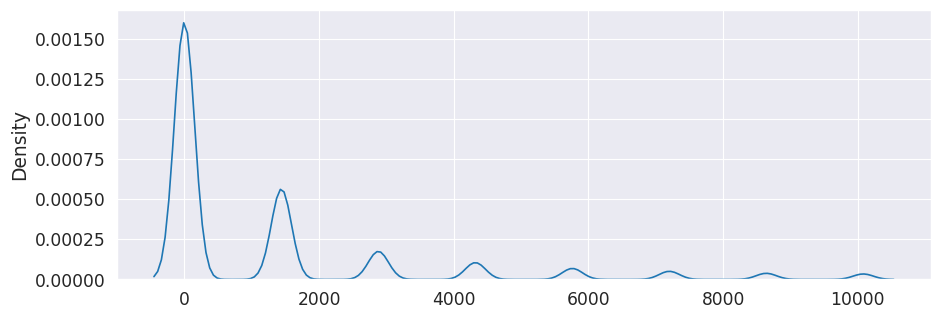

In [15]:
import seaborn as sns

import matplotlib.pyplot as plt


sns.set_style('darkgrid')


sns.set_context('paper', font_scale = 1.4)


plt.figure(figsize = (10.5, 3.5))


sns.kdeplot([i if i <= 10080 else None for i in ((df_.date_rptd - df_.date_occ).dt.days * (24*60)).values.tolist()])


# plt.xticks([i for i in range(0, 550, 50)])


# plt.xlabel("Hour")


plt.show()

In [16]:
df_ = df_.drop(columns = ['date_rptd'])

In [17]:
pd.DataFrame(df_.dtypes)

,0
date_occ,datetime64[ns]
time_occ,object
area_name,object
rpt_dist_no,object
crm_cd_desc,object
mocodes,object
vict_age,int64
vict_sex,object
vict_descent,object
premis_desc,object


In [18]:
df_["month_occ"] = df_.date_occ.apply(lambda x: dt.datetime.strftime(x, "%m"))


df_["week_number_occ"] = df_.date_occ.apply(lambda x: dt.datetime.strftime(x, "%U"))


df_["dow_occ"] = df_.date_occ.apply(lambda x: dt.datetime.strftime(x, "%w"))


df_["dom_occ"] = df_.date_occ.apply(lambda x: dt.datetime.strftime(x, "%d"))


df_["doy_occ"] = df_.date_occ.apply(lambda x: dt.datetime.strftime(x, "%-j"))


In [19]:
pd.DataFrame(df_.dtypes)

,0
date_occ,datetime64[ns]
time_occ,object
area_name,object
rpt_dist_no,object
crm_cd_desc,object
mocodes,object
vict_age,int64
vict_sex,object
vict_descent,object
premis_desc,object


In [20]:
df_ = df_.drop(columns = ['year_occ'])

In [21]:
pd.DataFrame(df_.dtypes)

,0
date_occ,datetime64[ns]
time_occ,object
area_name,object
rpt_dist_no,object
crm_cd_desc,object
mocodes,object
vict_age,int64
vict_sex,object
vict_descent,object
premis_desc,object


In [22]:
df_.sample(1)

,date_occ,time_occ,area_name,rpt_dist_no,crm_cd_desc,mocodes,vict_age,vict_sex,vict_descent,premis_desc,location,lat,lon,hour_occ,month_occ,week_number_occ,dow_occ,dom_occ,doy_occ
66877,2020-06-03,16:00,Northeast,1144,CRIMINAL THREATS - NO WEAPON DISPLAYED,0400 0408 0421 0552 0913,18,F,W,SINGLE FAMILY DWELLING,2900 ANGUS ST LOS ANGELES,34.107,-118.2691,16,06,22,3,03,155


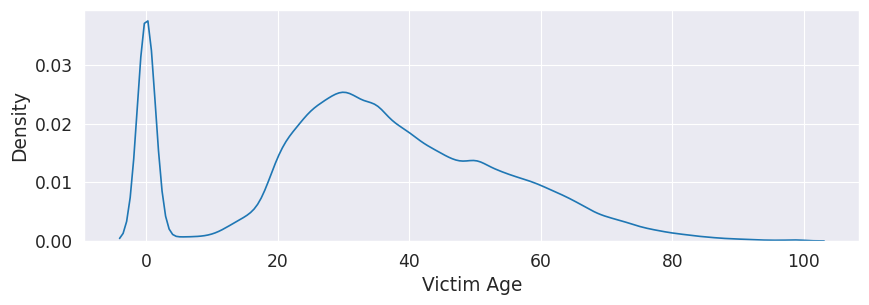

In [23]:
plt.figure(figsize = (10, 3))

sns.kdeplot(df_.vict_age)

plt.xlabel("Victim Age")

# plt.xticks([i for i in range(0, 130, 10)])

plt.show()

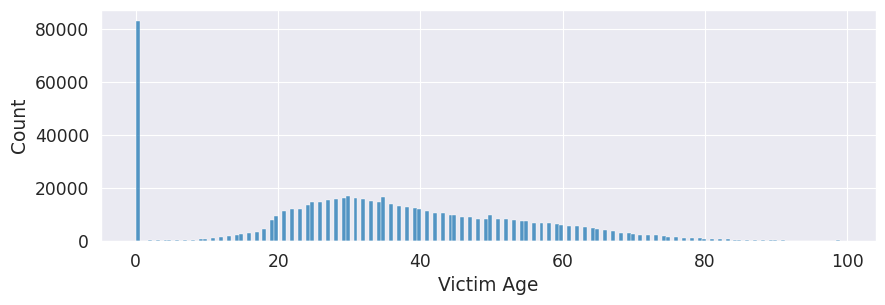

In [24]:
plt.figure(figsize = (10, 3))

sns.histplot(df_.vict_age)

plt.xlabel("Victim Age")

plt.show()

In [25]:
pd.DataFrame(df_.vict_age.describe())

,vict_age
count,641109.000000
mean,34.439373
std,19.686014
min,0.000000
25%,24.000000
50%,34.000000
75%,48.000000
max,99.000000


In [26]:
round((pd.DataFrame(df_[df_.vict_age == 0].crm_cd_desc.value_counts()) / df_[df_.vict_age == 0].crm_cd_desc.value_counts().sum()) * 100, 2)

,crm_cd_desc
BURGLARY,16.76
"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)",13.53
SHOPLIFTING - PETTY THEFT ($950 & UNDER),12.23
THEFT PLAIN - PETTY ($950 & UNDER),6.01
ROBBERY,5.84
...,...
DISHONEST EMPLOYEE ATTEMPTED THEFT,0.00
GRAND THEFT / INSURANCE FRAUD,0.00
BIKE - ATTEMPTED STOLEN,0.00
"RAPE, ATTEMPTED",0.00


In [27]:
round((pd.DataFrame(df_[df_.vict_age != 0].crm_cd_desc.value_counts()) / df_[df_.vict_age == 0].crm_cd_desc.value_counts().sum()) * 100, 2)

,crm_cd_desc
BATTERY - SIMPLE ASSAULT,69.91
THEFT OF IDENTITY,54.86
BURGLARY FROM VEHICLE,53.67
"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",49.30
INTIMATE PARTNER - SIMPLE ASSAULT,44.68
...,...
FIREARMS RESTRAINING ORDER (FIREARMS RO),0.00
FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO),0.00
PETTY THEFT - AUTO REPAIR,0.00
LYNCHING - ATTEMPTED,0.00


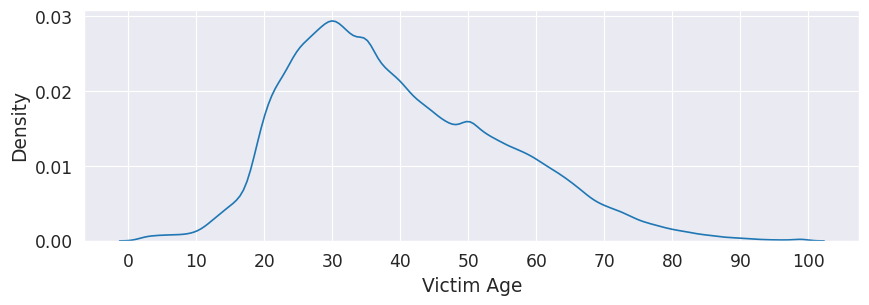

In [28]:
plt.figure(figsize = (10, 3))

sns.kdeplot(df_[df_.vict_age != 0].vict_age.values)

plt.xlabel("Victim Age")

plt.xticks([i for i in range(0, 110, 10)])

plt.show()

In [29]:
pd.DataFrame(df_[df_.vict_age != 0].vict_age.describe())

,vict_age
count,558037.000000
mean,39.566179
std,15.568611
min,2.000000
25%,28.000000
50%,37.000000
75%,50.000000
max,99.000000


In [30]:
# Ages greater than zero.


df_ = df_[df_.vict_age > 0]

In [31]:
df_.sample(1)

,date_occ,time_occ,area_name,rpt_dist_no,crm_cd_desc,mocodes,vict_age,vict_sex,vict_descent,premis_desc,location,lat,lon,hour_occ,month_occ,week_number_occ,dow_occ,dom_occ,doy_occ
639364,2022-11-21,12:30,Pacific,1483,BATTERY - SIMPLE ASSAULT,0444,23,F,H,MARKET,8700 LINCOLN BL LOS ANGELES,33.9568,-118.429,12,11,47,1,21,325


In [32]:
pd.DataFrame(round((df_.month_occ.value_counts() / df_.month_occ.value_counts().sum()) * 100, 2))

,month_occ
01,9.82
05,9.62
03,9.51
02,9.27
04,9.27
06,8.53
07,7.55
10,7.54
08,7.47
09,7.23


In [33]:
pd.DataFrame(df_.dtypes)

,0
date_occ,datetime64[ns]
time_occ,object
area_name,object
rpt_dist_no,object
crm_cd_desc,object
mocodes,object
vict_age,int64
vict_sex,object
vict_descent,object
premis_desc,object


In [34]:
df_ = df_.drop(columns = ['date_occ', 'time_occ', 'mocodes'])

In [35]:
df_.sample(1)

,area_name,rpt_dist_no,crm_cd_desc,vict_age,vict_sex,vict_descent,premis_desc,location,lat,lon,hour_occ,month_occ,week_number_occ,dow_occ,dom_occ,doy_occ
48706,Hollywood,0632,BATTERY - SIMPLE ASSAULT,33,M,O,PARKING LOT,7900 W SUNSET BL LOS ANGELES,34.098,-118.3623,12,08,31,6,08,221


In [36]:
# df_.to_parquet("/content/drive/MyDrive/Projects/la_cr_data/crm_df_preprocessed.parquet")

In [37]:
df_ = df_.sample(frac = 1)

### Preprocessing

In [38]:
# Clustering location coordinates using Gaussian Mixture Model

from sklearn.mixture import GaussianMixture


gmm_coord = GaussianMixture(n_components = 100).fit(df_[['lon', 'lat']].to_numpy())


print(gmm_coord.n_iter_)

12


In [39]:
coords_labels = gmm_coord.predict(df_[['lon', 'lat']].to_numpy())

In [40]:
with open("/content/drive/MyDrive/Projects/la_cr_data/coords_trained_gmm.pickle", 'wb') as gmm_coord_file:


  dump(gmm_coord, gmm_coord_file, protocol = pickle.HIGHEST_PROTOCOL)

In [41]:
df_ = df_.drop(columns = ['lat', 'lon'])


df_['coord_label'] = coords_labels

In [43]:
pd.DataFrame(df_.location).to_parquet("/content/drive/MyDrive/Projects/la_cr_data/locs.parquet")

In [41]:
# Vectorizing Location Texts

from sklearn.feature_extraction.text import CountVectorizer


v = CountVectorizer()


loc_count = v.fit_transform(df_.location.values)



loc_count = loc_count.toarray()

In [ ]:
loc_count_df = pd.DataFrame(loc_count)

loc_count_df.columns = [str(i) for i in loc_count_df.columns.values]


loc_count_df.to_parquet("/content/drive/MyDrive/Projects/la_cr_data/loc_count.parquet")

In [ ]:
df_ = df_.drop(columns = ['location'])

In [ ]:
df_['location_label'] = loc_labels

In [ ]:
df_.sample(1)

In [ ]:
pd.DataFrame(df_.vict_age.describe())

In [ ]:
df_['vict_age_bin'] = pd.cut(

    df_.vict_age,

    [0,10,20,30,40,50,60,70,80,90,100],

    labels = ["0-10","10-20","20-30","30-40","40-50","50-60","60-70","70-80","80-90","90-100"]


  )

In [ ]:
df_ = df_.drop(columns = ['vict_age'])

In [ ]:
df_.sample(1)

In [ ]:
# df_25 = df_.sample(frac = 0.25)


# features_25 = df_25[['area_name',
#  'rpt_dist_no',
#  'vict_sex',
#  'vict_descent',
#  'premis_desc',
#  'location',
#  'hour_occ',
#  'month_occ',
#  'week_number_occ',
#  'dow_occ',
#  'dom_occ',
#  'doy_occ',
#  'coord_label',
#  'vict_age_bin']]


# target_25 = df_25['crm_cd_desc']


# unique_target_vals_25 = list(target_25.unique())


# unique_target_vals_25.sort()


# un_target_vals_25_mapper_dict = {}



# for i in range(len(unique_target_vals_25)):


#   un_target_vals_25_mapper_dict[unique_target_vals_25[i]] = f"({i + 1}) " + unique_target_vals_25[i]




# target_25 = target_25.apply(lambda x: un_target_vals_25_mapper_dict[x])




# data_dict_25 = {"features": features_25, "target": target_25}


In [ ]:
# with open("/content/drive/MyDrive/Projects/la_cr_data/la_data_dict_25.pickle", 'wb') as data_dict_file_:


#   dump(data_dict_25, data_dict_file_, protocol = pickle.HIGHEST_PROTOCOL)

In [ ]:
# features = df_[['area_name',
#  'rpt_dist_no',
#  'vict_sex',
#  'vict_descent',
#  'premis_desc',
#  'location',
#  'hour_occ',
#  'month_occ',
#  'week_number_occ',
#  'dow_occ',
#  'dom_occ',
#  'doy_occ',
#  'coord_label',
#  'vict_age_bin']]



# target = df_['crm_cd_desc']

In [ ]:
# unique_target_vals = list(target.unique())


# unique_target_vals.sort()


# unique_target_vals_mapper_dict = {}


# for i in range(len(unique_target_vals)):


#   unique_target_vals_mapper_dict[unique_target_vals[i]] = f"({i + 1}) " + unique_target_vals[i]



# target = target.apply(lambda x: unique_target_vals_mapper_dict[x])

In [ ]:
# data_dict = {"features": features, "target": target}

In [ ]:
# with open("/content/drive/MyDrive/Projects/la_cr_data/la_data_dict.pickle", 'wb') as data_dict_file:


#   dump(data_dict, data_dict_file, protocol = pickle.HIGHEST_PROTOCOL)